# Notation and Operation Review

>For a refresher see Zico Kolter's [*Linear Algebra Review and Reference*](http://www.cs.cmu.edu/~zkolter/course/linalg/linalg_notes.pdf)



## Matrices (2-d arrays):

$$\begin{equation*}
X_{ij} = 
\begin{pmatrix}
x_{11} & \dots & x_{1j} \\
x_{21} & \dots & x_{2j} \\
x_{31} & \dots & x_{3j} \\
\dots & \dots & \dots \\
x_{i1} & \dots & x_{ij}
\end{pmatrix}
\end{equation*}
$$

### Example:
$$\begin{equation*}
X_{ij} = 
\begin{pmatrix}
1 & 3 \\
2 & 5 \\
3 & 7 
\end{pmatrix}
\end{equation*}
$$

$X_{1,1} = 1, X_{1,2} = 3, \dots$


> A **Vector** is sometime used to describe a $nx1$ matrix, with elements described by $x_{1},x_{2},\dots,x_{i}$

In [121]:
import numpy as np

X = np.array([[1,3], [2,5], [3,7]])
print(X)

[[1 3]
 [2 5]
 [3 7]]


### Multiplying by a scalar (i.e., coefficient and/or weight)

$$\begin{equation*}
2*X_{ij} = 2*
\begin{pmatrix}
1 & 3 \\
2 & 5 \\
3 & 7 
\end{pmatrix} = 
\begin{pmatrix}
2*1 & 2*3 \\
2*2 & 2*5 \\
2*3 & 2*7 
\end{pmatrix} =
\begin{pmatrix}
2 & 6 \\
4 & 10 \\
6 & 14 
\end{pmatrix}
\end{equation*}
$$

In [122]:
print(2*X)

[[ 2  6]
 [ 4 10]
 [ 6 14]]


### Multiplying by a vector

$$\begin{equation*}
(2, 3) *
\begin{pmatrix}
1 & 3 \\
2 & 5 \\
3 & 7 
\end{pmatrix} = 
\begin{pmatrix}
2*1 & 3*3 \\
2*2 & 3*5 \\
2*3 & 3*7 
\end{pmatrix} =
\begin{pmatrix}
2 & 9 \\
4 & 15 \\
6 & 21 
\end{pmatrix}
\end{equation*}
$$

In [123]:
print(np.array([2,3])*X)

[[ 2  9]
 [ 4 15]
 [ 6 21]]


### Transpose ($X^{T}$)

$$\begin{equation*}
X_{3,2} = 
\begin{pmatrix}
1 & 3 \\
2 & 5 \\
3 & 7 
\end{pmatrix}
\end{equation*}
$$

$$\begin{equation*}
X^{T} = 
\begin{pmatrix}
1 & 2 & 3 \\
3 & 5 & 7 \\
\end{pmatrix} = A_{2,3}
\end{equation*}
$$

In [124]:
print(X.T)

[[1 2 3]
 [3 5 7]]


### Dot product

$$\begin{equation*}
X^{T}X = 
\begin{pmatrix}
1 & 2 & 3 \\
3 & 5 & 7 \\
\end{pmatrix}
* 
\begin{pmatrix}
1 & 3 \\
2 & 5 \\
3 & 7 
\end{pmatrix}
= 
\begin{pmatrix}
1*1+2*2+3*3 & 1*3+2*5+3*7 \\
3*1+5*2+7*3 & 3*3+5*5+7*7 \\
\end{pmatrix}
=
\begin{pmatrix}
14 & 34 \\
34 & 83 \\ 
\end{pmatrix}
\end{equation*}
$$

In [125]:
X_dot = np.dot(X.T, X)
print(X_dot)

[[14 34]
 [34 83]]


### Inverse of square matrix

#### Inverse of matrix only exists for square matrices ${m,m}$

$$
\begin{equation}
(X^TX)^{-1} =
\begin{pmatrix}
14 & 34 \\
34 & 83 \\ 
\end{pmatrix}^{-1}=
\begin{pmatrix}
\begin{array}{cc|cc}
14 & 34 & 1 & 0\\
34 & 83 & 0 & 1\\ 
\end{array}
\end{pmatrix}=
\begin{pmatrix}
13.833 & -5.667 \\
-5.667 & 2.333
\end{pmatrix}
\end{equation}
$$

For information on finding the inverse see [Gauss-Jordan Elimination](https://online.stat.psu.edu/statprogram/reviews/matrix-algebra/gauss-jordan-elimination)

In [126]:
from numpy.linalg import inv

print(inv(X_dot))

[[13.83333333 -5.66666667]
 [-5.66666667  2.33333333]]


## That gives us most of what we need in order to understand least squares regression

###  See documentation [numpy.](https://numpy.org/doc/stable/index.html) for additional documentation:

[numpy.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)
<br>[numpy.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
<br>[numpy.transpose](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html) 

# Linear Regression - Supervised Learning for Continuous Outcomes
Loosely following Chapter 10 of Python Machine Learning 3rd Edition, Raschka

>Disclaimer: Regression is a huge field. It is impossible to cover it all in one class (or even two).

<img src='files/diagrams/ols.png'>

[Image Source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

>For a sense of the depth and potential complexity of regression models, see [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com)

# Ordinary Least Squares (OLS) Linear Regression

>[All models are wrong, but some are useful.](https://en.wikipedia.org/wiki/All_models_are_wrong)
<br><br>George Box

Linear regression is one of the most popular, widely used, and foundational concepts in statistics, econometrics, and machine learning.  

Boils down having a numeric target value ($y$) we want to either predict or understand the variance drivers. We use data ($X$) we think impacts our target to understand the underlying **linear** relationship.

### Big Assumption: 
- The regression function $E(Y|X)$ is **linear** in the inputs $X_{1},\dots,X_{p}$
- Transformations can be applied to satisfy that requirment.

Typically will see it expressed as $y = \beta X$, or formally:  

$$
f(X)=\beta_{0}+\sum{X{j}\beta_{j}}
$$

- Linear model assumes the function is linear or reasonably linear.
- The true $\beta_{j}$'s are unknown parameters (coefficients/weights). 
- The features must be able to be represented within a non-null numeric matrix.


### Goal - Minimize the mean-squared error. Why?
Residuals will be positive and negative, need to penalize negative and positive equally.

Sum of errors: $\epsilon_{1} + \epsilon_{2} + \dots + \epsilon_{n}$  
RSS: $\epsilon_{1}^2 + \epsilon_{2}^2 + \dots + \epsilon_{n}^2$  
MSE: $\frac{1}{N}\sum{\epsilon_{i}^2}$


Most statistical programs solve for the $\beta$ values using plain old linear alegbra, in what is called the closed-form:  

$\hat\beta = (X^TX)^{-1}X^{T}y$

### Closed Form Derivation

$$RSS(\beta)=\sum{(y_{i}-f(x_{i}))^2}$$

$$=\sum(y_{i}-\beta_{0}-\sum{x_{ij}\beta{j}})^2$$

$(x_i,y_i)$ should be independent from other $(x_i,y_i)$'s  
- Time series models violate this without special treatment

We are seeking a $f(X)$ that minimizes the sum of squared residuals from $Y$:

<img src='files/diagrams/esl-3-1.png'>


[Image source: Elements of Statistical Learning, Figure 3.1](https://www.statlearning.com)

$$
RSS(\beta)=(y-X\beta)^T(y-X\beta)
$$

#### Differentiating:
$$
\frac{dRSS}{d\beta}=-2X^T(y-X\beta)
$$

#### And again:
$$
\frac{d^2RSS}{d\beta d \beta^T}=2X^TX
$$

#### Setting the first derivative to zero:
$$ 
X^T(y-X\beta)=0
$$

#### And we get:
$$
\hat{\beta}=(X^TX)^{-1}X^Ty
$$

#### And our predicted values are:
$$
\hat{y}=X\hat{\beta}
$$

#### And relates to $y$ by:
$$
y = \hat{y} + \epsilon =X\hat{\beta}+\epsilon 
$$

### Unique solution means we can derive with pure linear algebra!

## Slope and Intercept
### Remember in its simple form: $$y=mx+b$$

<img src='files/diagrams/slope.png' style="height: 350px;width: 350px;">

[Image source](https://en.wikipedia.org/wiki/Linear_regression#/media/File:Linear_least_squares_example2.png)

Since we need an estimate for the intercept, we'll need to manually add the constant. 

- Intercept: where the line go through the y-axis.  
- Slope: for a 1-unit change in x, y will increase by $\beta$


# Example - Credit Data
[Data from Elements of Statistical Learning](https://www.statlearning.com)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

credit = pd.read_csv('data/islr-credit.csv')
credit = credit.iloc[:, 1:]
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Find Function so $Rating=f(Limit)$
We'll need to convert the pandas objects to numpy arrays.

In [128]:
X = np.array(credit['Limit']).reshape(-1,1)
y = np.array(credit['Rating']).reshape(-1,1)

X.shape, y.shape

((400, 1), (400, 1))

And since we are going to implement a version, we'll need to manually add the constant for the intercept. Why?

$y=\beta_{0}(1)+\beta_{i}x_{i}$

In [129]:
from numpy.linalg import inv

'''
- Manually adding the constant
- Sometimes this is done via the API (check the docs)
''' 
const = np.ones(shape=y.shape)
mat = np.concatenate( (const, X), axis=1)

# first 5 examples
mat[:5,:]

array([[1.000e+00, 3.606e+03],
       [1.000e+00, 6.645e+03],
       [1.000e+00, 7.075e+03],
       [1.000e+00, 9.504e+03],
       [1.000e+00, 4.897e+03]])

## Betas
We have a feature matrix that has 2 columns, so we'll get estimate for the constant ($\beta_{0}$) and the credit limit ($\beta_{1}$).

### Calculate the coefficient estimates
Recall $\hat\beta = (X^TX)^{-1}X^{T}y$

In [130]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(y)
b0, b1 = betas

print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: 38.492
Beta 1: 0.067


### Predict $\hat{y}$ and plot the fit

$$
\begin{equation}
\hat{y}=\hat{\beta}X=
\hat{\beta_{0}}
\begin{pmatrix}
1 \\
\dots \\
1
\end{pmatrix}+
\hat{\beta_{1}}
\begin{pmatrix}
3606 \\
\dots \\
5524
\end{pmatrix}
\end{equation}
$$

In [131]:
yhat = mat.dot(betas)
yhat[:5, :]

array([[279.45644998],
       [482.53232508],
       [511.26632517],
       [673.58001409],
       [365.72527352]])

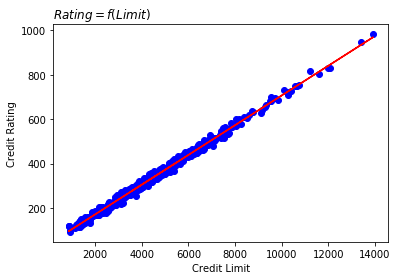

In [132]:
plt.plot(X, y, 'bo')
plt.plot(X, yhat, 'r')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Rating')
plt.title('$Rating=f(Limit)$', loc='left')
plt.show()

## Quantifying fit with metrics
Common metrics:

### $R^2$ [Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination)
$$1 - \frac{\sum (\hat {y}-y)^{2}}{\sum ({\bar y}-y)^{2}}$$

### Mean squared error (MSE) [Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)
$$\frac{\sum (\hat {y}-y)^{2}}{n}$$

### Mean Absolute Error (MAE) [Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)
$$1/n\sum |\hat {y}-y|$$

### Root mean squared error (RMSE) [Wikipedia](https://en.wikipedia.org/wiki/Root_mean_square)
$$\sqrt \frac{\sum (\hat {y}-y)^{2}}{n}$$

#### Notes:
- $r^2$ expresses the percent of variance explained (bound between 0% and 100%).  
- RMSE expresses the variance in unit terms.  
- MSE/MAE are heavily influenced by outliers.  
- Usually RMSE is chosen for optimizing since it's an unbiased estimator.
- If there are a lot of outliers, MAE may be a better choice.

### Further reading:
[$r^2$ vs. RMSE](https://www.statology.org/rmse-vs-r-squared/)

# Intrepretability
A nice property of linear regression is the relatively simple intrepretations that can be drawn. The implementation in statsmodels includes all the output needed to evaluate and interpret model output.

[statsmodels OLS regression](https://www.statsmodels.org/stable/regression.html)

In [133]:
# betas we calculated:
betas.reshape(1,-1)[0]

array([38.49178871,  0.06682326])

statsmodels output:

In [134]:
import statsmodels.api as smf

simpleModel = smf.OLS(y, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sat, 18 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:11:53   Log-Likelihood:                -1568.1
No. Observations:                 400   AIC:                             3140.
Df Residuals:                     398   BIC:                             3148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4918      1.397     27.555      0.0

## Results Discussion:
- Overall $r^2$ of 99% - very strong linear relationship as we saw in the initial plot we created.  
- You can ignore the t-statistic on the constant - it isn't meaningful.  
- The t-statistic for the credit limit (x1) is very high (252), with a [p-value](https://en.wikipedia.org/wiki/P-value) of essentially 0 - recall a p-value is the probably that the effect we are seeing is by random chance.  
- We can conclude there is a very strong linear relationship.

### Further reading:
[Rethinking p-values](https://www.vox.com/2016/3/15/11225162/p-value-simple-definition-hacking)  
[Econometrics](https://en.wikipedia.org/wiki/Econometrics)

# p-Hacking

<img src='files/diagrams/bad-coef.png' style="width: 500px;">

>Taken from "Having Too Little or Too Much Time Is Linked to Lower Subjective Well-Being", Sharif et al.

# scikit-learn's LinearRegression
[scikit-learn's LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

This will probably be the implementation you'd want to use for comparing various regression models for prediction problems since the API will be similar.

scikit-learn is geared more towards prediction and won't have some of the friendly output that statsmodels has - if you are going for an intrepretation, you may be better off using statsmodels.

In [135]:
from sklearn.linear_model import LinearRegression

# we added the intercept manually, so turn that option off
skOLS = LinearRegression(fit_intercept=False).fit(mat,y)
skOLS.coef_

array([[38.49178871,  0.06682326]])

#### And they all provide the same coefficient/model estimates - assuming the same set-up.

In [136]:
print(betas.reshape(1,-1)[0])
print(simpleModel.params)
print(skOLS.coef_[0])

[38.49178871  0.06682326]
[38.49178871  0.06682326]
[38.49178871  0.06682326]


# Weakness - Outlier Sensitivity
There aren't any outliers in the data, I'm going to introduce one.

In [137]:
matCopy = mat.copy()
matCopy[4, 1] = matCopy[4, 1] + 150000

outModel = smf.OLS(y, matCopy).fit()
print(outModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     37.54
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           2.16e-09
Time:                        13:11:53   Log-Likelihood:                -2565.7
No. Observations:                 400   AIC:                             5135.
Df Residuals:                     398   BIC:                             5143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        325.3864      8.837     36.820      0.0

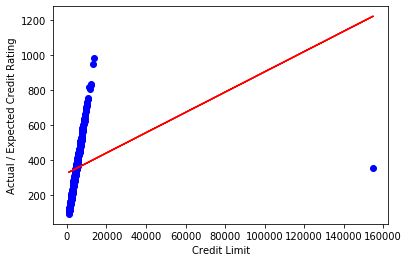

In [138]:
yhat_out = outModel.predict(matCopy)

plt.plot(matCopy[:,1], y, 'bo')
plt.plot(matCopy[:,1], yhat_out, 'r')
plt.xlabel('Credit Limit')
plt.ylabel('Actual / Expected Credit Rating')
plt.show()

## Why the sensitivity?
Recall we are minimizing the sum of squared residuals. That really big outlier is going to a lot of influence.  

## How to combat?
- [RANdom SAmple Consensus (RANSAC)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)  
- Replace or remove the outliers. 


## RANSAC
- Select random samples. 
- Tests non-sample points and creates a inlier list (opposite of outlier).  
- Refits models with all inliers.  
- Evaluates error.  
- Stops or repeats until iterations/threshold met.
- **Not guaranteed to get same answer each time* - why?**

> [More details](https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

<img src='files/diagrams/ransac.png'>

[Image Source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html)

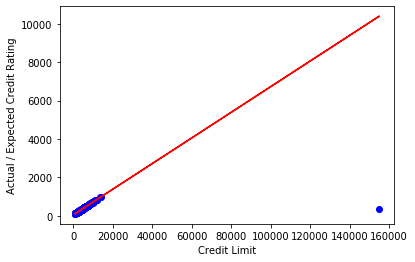

In [139]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor().fit(matCopy, y)
yhat_ransac = ransac.predict(matCopy)

plt.plot(matCopy[:,1], y, 'bo')
plt.plot(matCopy[:,1], yhat_ransac, 'r')
plt.xlabel('Credit Limit')
plt.ylabel('Actual / Expected Credit Rating')
plt.show()

# Strength: Robust to Overfitting
>Simple is better than complex.

### No Overfitting
<img src='files/diagrams/reg.png'  style="width: 400px;"> 

### Severe Overfitting
<img src='files/diagrams/poly.png'  style="width: 400px;">

# Multiple Regression
Instead of an $mx1$ input matrix, we'll have $mxn$.

### $y = w_{0} + w_{1}x_{1} + \dots + w_{m}x_{m} = \sum{w_{i}x_{i}}=w^{T}x$

Coefficients still reference the effect on $y$ of a 1-unit change to a $x$ - all else held constant.

Example with the Boston housing dataset:

## Boston Housing Data

In [140]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
%matplotlib inline

X, y = load_boston(return_X_y=True)
x0, x1 = X.shape

'''
Documentation available with this command: print(load_boston()['DESCR'])
'''

print(f'Rows: {x0:,}\nFeatures: {x1}')

Rows: 506
Features: 13


In [141]:
bostonDf = pd.DataFrame(load_boston()['data'], columns = load_boston().feature_names)
bostonT = pd.DataFrame(y, columns=['MED'])

bostonDf = pd.concat([bostonDf, bostonT], axis=1)
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [142]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Remember to explore the data
> Technically if you are focused on the coefficient intrepretation, your data should be normally distributed, always the t-statistics can be bias and unstable. For prediciton, it doesn't really matter.

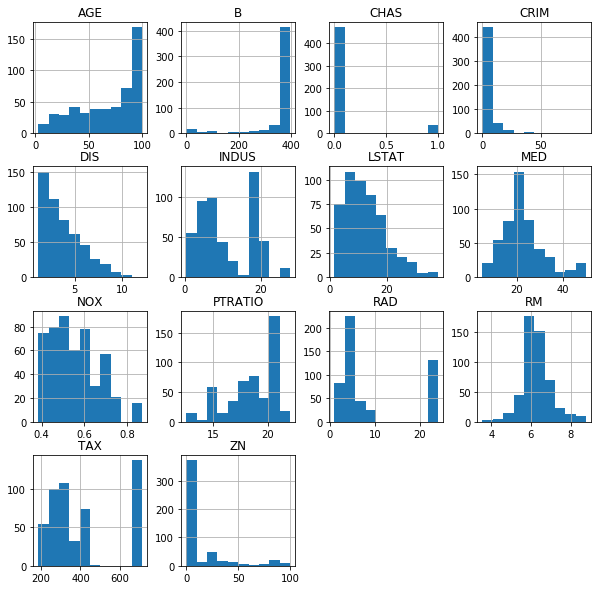

In [143]:
plt.rcParams["figure.figsize"] = (10,10)

bostonDf.hist()
plt.show()

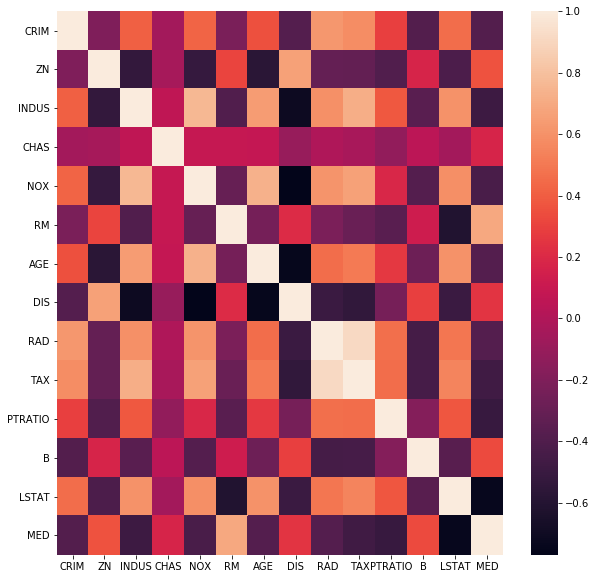

In [144]:
import seaborn as sns

sns.heatmap(bostonDf.corr())
plt.show()

## Run the regression

In [145]:
import statsmodels.api as smf
statsModelsCoefs = smf.OLS(bostonDf['MED'], bostonDf[load_boston().feature_names]).fit()
print(statsModelsCoefs.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MED   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Sat, 18 Sep 2021   Prob (F-statistic):                        0.00
Time:                        13:11:55   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Check Residuals

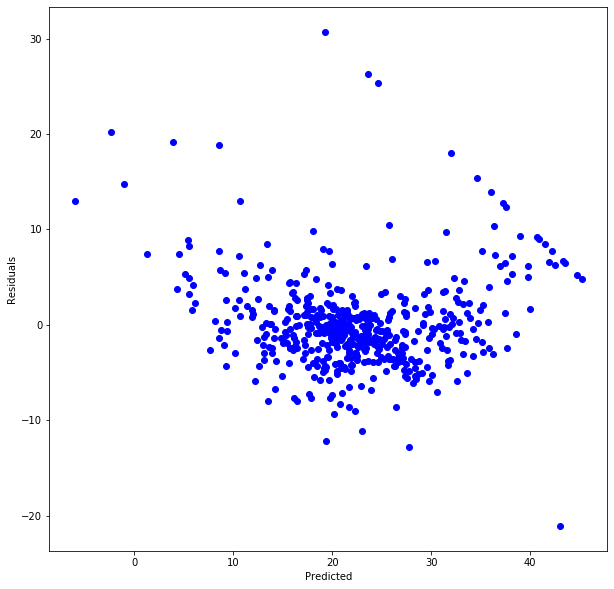

In [146]:
yhat_boston = statsModelsCoefs.predict(bostonDf[load_boston().feature_names])
resid_boston = y - yhat_boston

plt.plot(yhat_boston, resid_boston, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

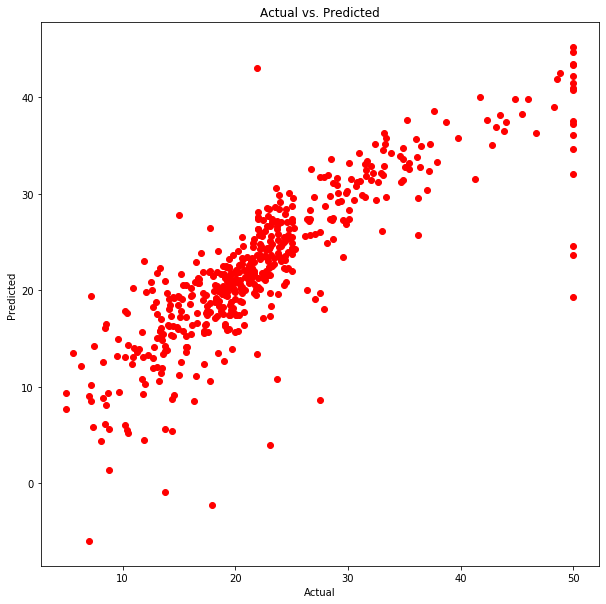

In [147]:
plt.plot(y, yhat_boston, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

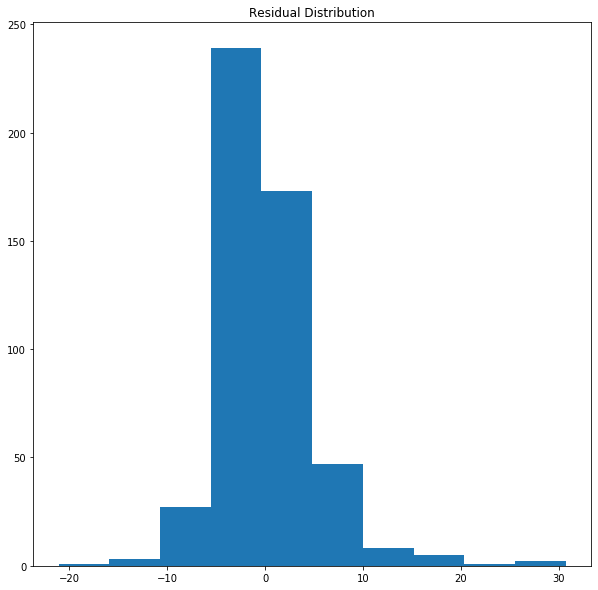

In [148]:
plt.hist(resid_boston)
plt.title('Residual Distribution')
plt.show()

### Patterns in residuals are not ideal. You'll want these to look like normally distributed white noise (ideally). We might be able to make those residuals behave with feature transformations and other techniques we'll talk about later.

>In certain cases, it may help to log-transform your target variable, which will compress some of the variance.

[Log-linear models](https://en.wikipedia.org/wiki/Log-linear_model)

In [149]:
import statsmodels.api as smf
logMED = np.log(bostonDf['MED'])

statsModelsCoefs = smf.OLS(logMED, bostonDf[load_boston().feature_names]).fit()
print(statsModelsCoefs.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MED   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              5532.
Date:                Sat, 18 Sep 2021   Prob (F-statistic):                        0.00
Time:                        13:11:56   Log-Likelihood:                         -21.839
No. Observations:                 506   AIC:                                      69.68
Df Residuals:                     493   BIC:                                      124.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

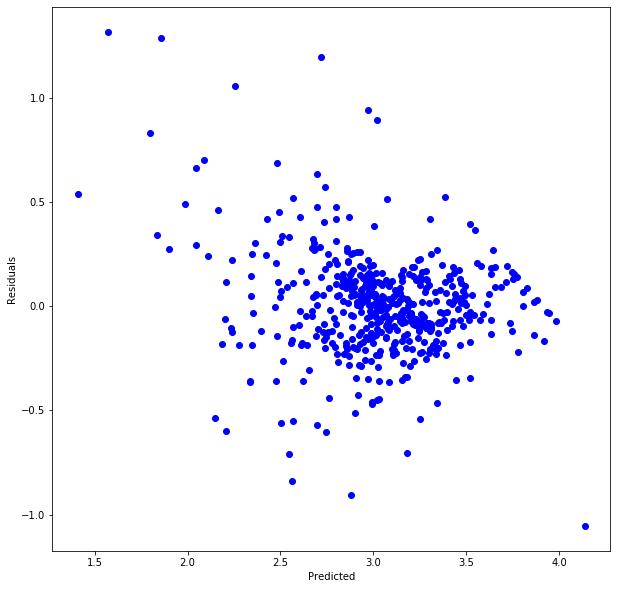

In [150]:
logyhat_boston = statsModelsCoefs.predict(bostonDf[load_boston().feature_names])
logresid_boston = logMED - logyhat_boston

plt.plot(logyhat_boston, logresid_boston, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

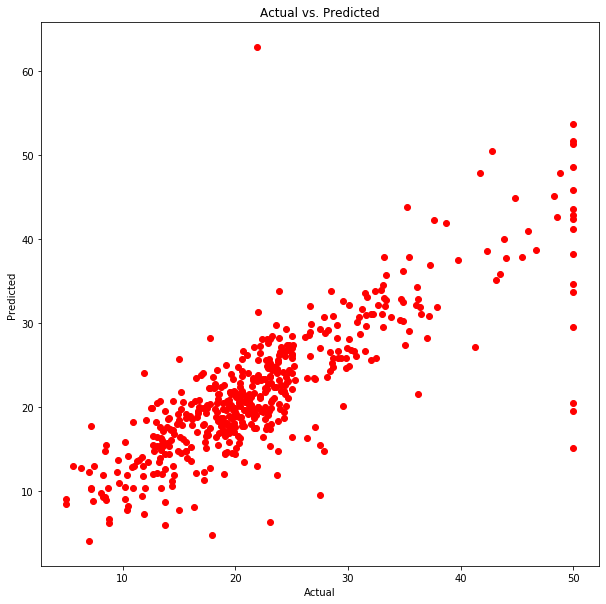

In [151]:
plt.plot(np.exp(logMED), np.exp(logyhat_boston), 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# What if we had categorical variables?

## Role of [Dummy Variables](https://en.wikipedia.org/wiki/Dummy_variable_(statistics))
A way to incorporate categorical data into modeling, since models require numerical matrices. Essentially acts to change the intercept.

### Simple Example

In [152]:
dummy = pd.DataFrame([[2,4,1],
                     [3,6,1],
                     [4,8,1],
                     [6,12,1],
                     [7,14,1],
                     [2,6,0],
                     [4,10,0],
                     [6,14,0],
                     [7,16,0],
                     [3,8,0]], columns=['hgt', 'wgt', 'label'])


dummy.head(2)

,hgt,wgt,label
0,2,4,1
1,3,6,1


### Persistent differences between these lines. Track parallel to one another.

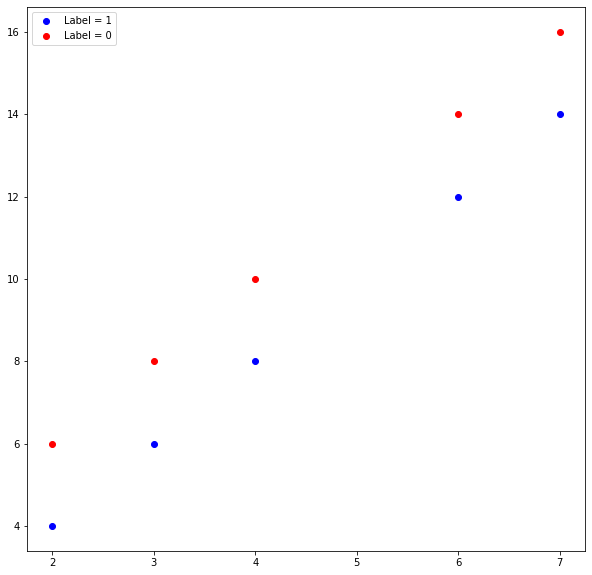

In [153]:
class1 = dummy.query('label==1')
class2 = dummy.query('label==0')

plt.plot(class1['hgt'], class1['wgt'], 'bo')
plt.plot(class2['hgt'], class2['wgt'], 'ro')
plt.legend(['Label = 1', 'Label = 0'])
plt.show()

### Let's look at the means for the data by group

In [154]:
dummy.groupby('label')['wgt'].mean().diff()[1]

-2.0

### Compare running a model with and without a dummy variable

In [155]:
from sklearn.linear_model import LinearRegression

Xa = np.array(dummy['hgt']).reshape(-1,1)
Xb = np.array(dummy[['hgt','label']])

y = np.array(dummy['wgt']).reshape(-1,1)

bothOLS = LinearRegression().fit(Xa,y)
yhat_both = bothOLS.predict(Xa)

sepOLS = LinearRegression().fit(Xb, y)
yhat_sep = sepOLS.predict(Xb)

In [156]:
print('No Dummy:\n')
print(f' Intercept: {np.round(bothOLS.intercept_[0],2)}')
print(f' Slope: {np.round(bothOLS.coef_[0][0],2)}\n')

print('w/ Dummy:\n')
print(f' Intercept: {np.round(sepOLS.intercept_[0], 2)}')
print(f' Slope: {np.round(sepOLS.coef_[0][0],2)}')
print(f' Dummy: {sepOLS.coef_[0][1]}')

No Dummy:

 Intercept: 1.0
 Slope: 2.0

w/ Dummy:

 Intercept: 2.0
 Slope: 2.0
 Dummy: -1.9999999999999996


### The dummy captures the mean difference! Otherwise the slope is identical.

If the dummy was present:
$$
y=1.0 + (2)(x_1) + (2)(1) 
$$

If the dummy was not present:
$$
y=2.0 + (2)(x_1) + (2)(0)
$$



# Recall the California Housing Data
[Example from "Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow"](https://github.com/ageron/handson-ml2)

In [157]:
import pandas as pd
import numpy as np

housing = pd.read_csv('data/housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [158]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## Goal - Predict Median House Value

#### Things we need to consider:
- Ocean Proximity is categorical. 
- Missing values in Total Bedrooms.  
- Data of significantly different scales.

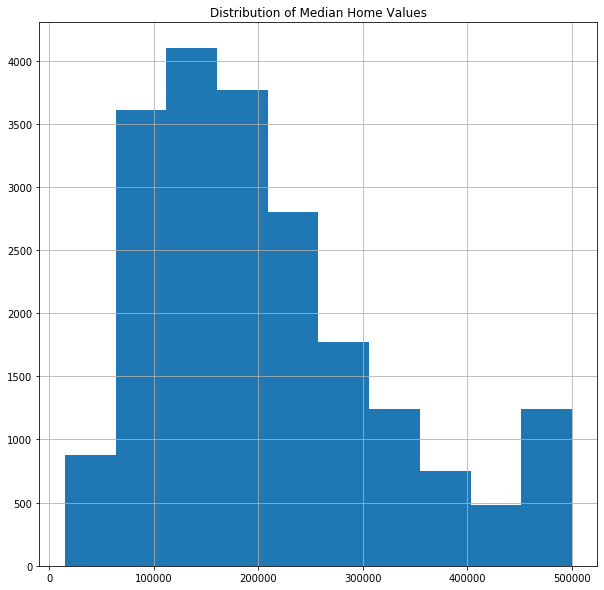

In [159]:
housing.median_house_value.hist()
plt.title('Distribution of Median Home Values')
plt.show()

# Exploratory Analysis

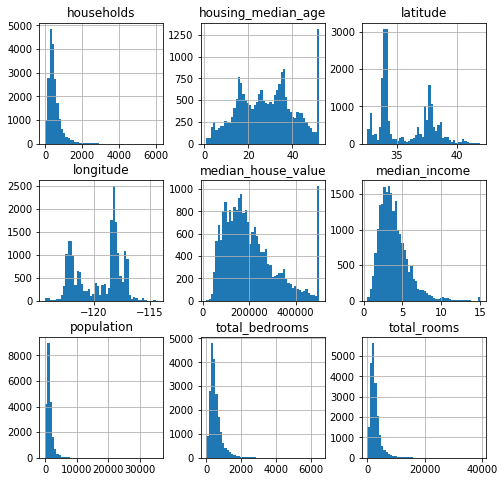

In [160]:
housing.hist(bins=50, figsize=(8,8))
plt.show()

Interesting items of note:
- Wide variances in scales. 
- Median house value truncated at $500,000  
- Outliers are present

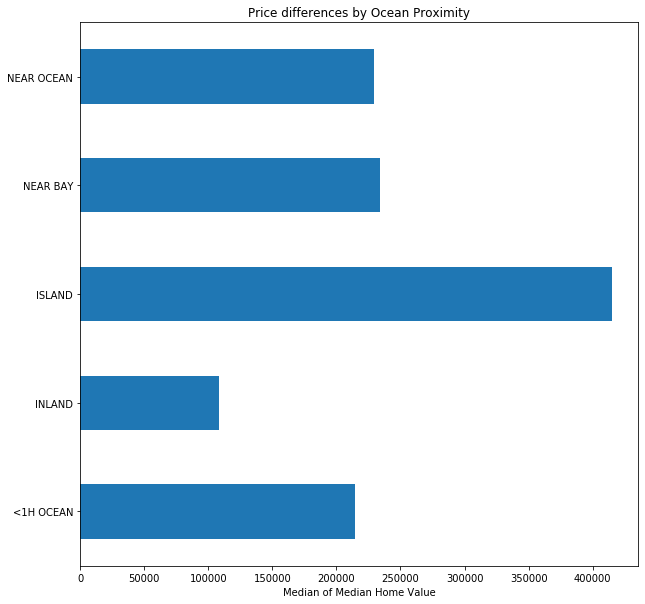

In [161]:
housing.groupby('ocean_proximity')['median_house_value'].median().plot.barh()
plt.xlabel('Median of Median Home Value')
plt.ylabel('')
plt.title('Price differences by Ocean Proximity')
plt.show()

Inland homes have significantly lower prices than homes closer to the water.

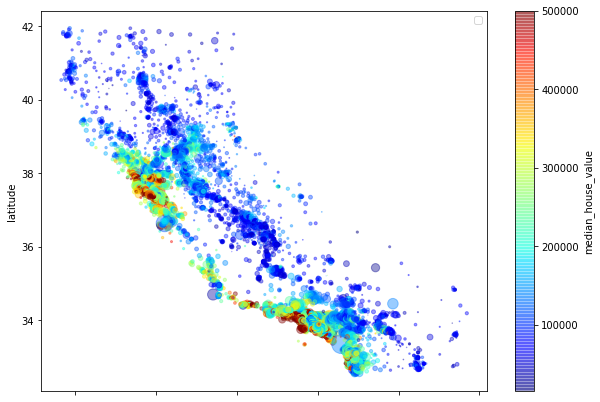

In [162]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100,
            label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'),
            colorbar=True)
plt.legend('')
plt.show()

Higher values are largely clustered around the coast.

[Example from "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow](https://github.com/ageron/handson-ml2)

# Missing Values

#### Options:
- Drop rows (bad). 
- Drop columns (bad).  
- Fill in the missing values (ding ding).  
- If categorical, might want to add a dummy to indicate it was missing (ding ding).  
- Best strategy will be situationally dependent. This can be treated as a hyperparameter - no perfect answer.

#### Strategies:
- Simple inputers with median, median, mode, random values.  
- Estimate the missing value with another machine learning model (increasing overal complexity).  

>Not all strategies will work for all data types, so you may need to split it up, e.g., one method for the numerical variables and another for the categorical variables.

In [163]:
housing.total_bedrooms.isna().sum()

207

### Filling with median

In [164]:
from sklearn.impute import SimpleImputer

example_imputer = SimpleImputer(strategy='median')
example_imputer.fit_transform(np.array(housing.total_bedrooms).reshape(-1,1))

example_imputer = pd.Series(example_imputer)
example_imputer.isna().sum()

0

### If you wanted to add an indictor for the missing value
> Probably more useful for categorical variables

In [165]:
from sklearn.impute import SimpleImputer

example_imputer = SimpleImputer(strategy='median', add_indicator=True)
example_imputer.fit_transform(np.array(housing.total_bedrooms).reshape(-1,1))

array([[ 129.,    0.],
       [1106.,    0.],
       [ 190.,    0.],
       ...,
       [ 485.,    0.],
       [ 409.,    0.],
       [ 616.,    0.]])

# One-Hot Encoding

From "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow":
> If a categorical attribute has a large number of possible categories, then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance.

#### Possible alternatives in that situation:
- Recode to a numerical feature, e.g., distance to ocean.  
- Convert to embeddings.  

#### Real risk:
May not have any islands in the training data, what would happen if we encountered that in our test/evaluation data?

In [166]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Islands are really rare

- Adding a dummy for this won't do much - it'll basically be zero.  
- Replace to nearest category?

In [167]:
from sklearn.preprocessing import OneHotEncoder

example_ohe = OneHotEncoder()
example_ohe = example_ohe.fit_transform(np.array(housing['ocean_proximity']).reshape(-1,1))
example_ohe

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

> Sparse matrix returns lists of coordinates in the matrix with a non-zero. It's a more efficient structure:

In [168]:
print(example_ohe[:5,])

  (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0


>Can be converted back to a dense format:

In [169]:
example_ohe.toarray()[:5,:]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

### Should we use this for modeling?

>In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation, the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.
<br><br>[Wikipedia](https://en.wikipedia.org/wiki/Multicollinearity)

### Could argue that this could be represented as an ordinal variable (island > near ocean > near bay > ...)
See [OrdinalEncoder for as example](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

# Scaling Numerical Variables

## Don't skip this - most models don't perform well when variables are on different scales.

In [170]:
housing.select_dtypes(['float','integer']).describe().round(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-120.0,36.0,29.0,2636.0,538.0,1425.0,500.0,4.0,206856.0
std,2.0,2.0,13.0,2182.0,421.0,1132.0,382.0,2.0,115396.0
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0
25%,-122.0,34.0,18.0,1448.0,296.0,787.0,280.0,3.0,119600.0
50%,-118.0,34.0,29.0,2127.0,435.0,1166.0,409.0,4.0,179700.0
75%,-118.0,38.0,37.0,3148.0,647.0,1725.0,605.0,5.0,264725.0
max,-114.0,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


## Two main methods:
> Only fit these to the training data, no leaking information from the test set!


### Min-max scaling
- Simple  
- Bound between 0 and 1 - a lot of algorithms like that, especially neural networks
- scikit-learn gives you some additional flexibility in terms of the range  
- Very susceptible to outliers

$$
x_{scaled} = \frac{x - x_{min}}{x_{max}-x_{min}}
$$

### Standardization
- Little more involved. 
- More robust to outliers. 
- No specific range boundary. 

$$
x_{scaled} = \frac{x - \hat{x}}{\sigma_{x}}
$$

Since we are doing regression and don't have a scaling boundary requirement and there are probably outliers, we'll use standardization.

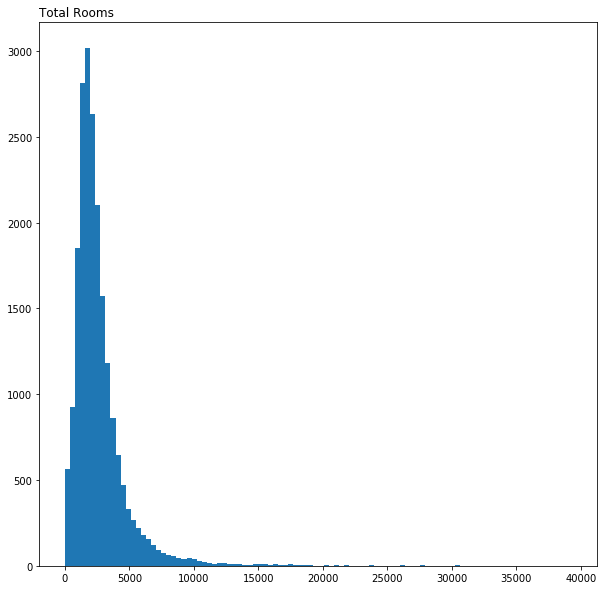

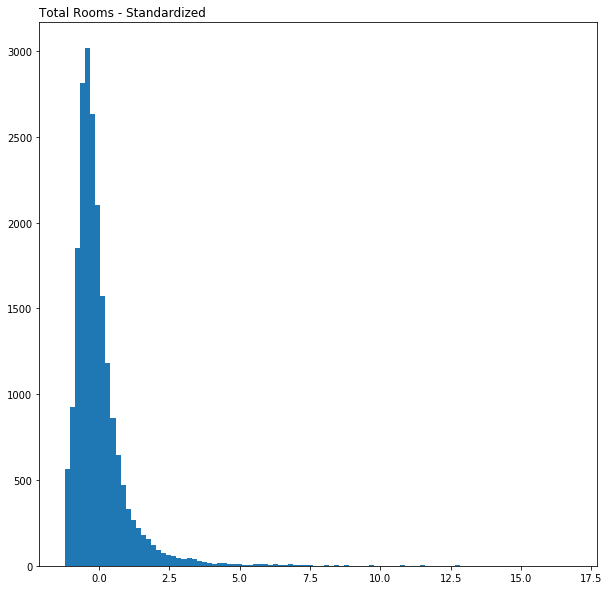

In [171]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

example_SS = StandardScaler()
example_SS = example_SS.fit_transform(np.array(housing.total_rooms).reshape(-1,1))

plt.hist(housing.total_rooms, bins=100)
plt.title('Total Rooms', loc='left')
plt.show()

plt.hist(example_SS, bins=100)
plt.title('Total Rooms - Standardized', loc='left')
plt.show()

# Training/Test Splits

>Put the test data aside and never look at it again.

- All of the feature transformations and model training should be on the training data.  
- In production, you wouldn't exactly know what the incoming data would look like ahead of time.  
- If you use the test data to inform **any** of the feature transformations or modeling, then you are letting that test data leak into the training data and that will (may) bias your evaluations. This is called **leakage** or **data snooping** - both are not good.

### Simpliest form is splitting your data into two parts:
- Training: will base feature transforms and modeling on this. 
- Test: evaluate the models on this data. 

>There are more robust methods that we'll talk about later. You can think of this simple splitting as a quick and dirty way to evaluate performance, but it isn't a methodology you'd want to use to estimate what your performance is truly likely to be.

### Split off the features and the target variable

In [172]:
y = housing.median_house_value

features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
            'population', 'households', 'median_income', 'ocean_proximity', 'longitude', 'latitude'
           ]

X = housing[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   ocean_proximity     20640 non-null  object 
 7   longitude           20640 non-null  float64
 8   latitude            20640 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


### Split into training and test sets
>80/20 split is pretty standard, but not universal. For very large datasets, I've heard of 99/1 splits.

In [173]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 16,512
Test samples: 4,128


>Remember, the test data is only for evaluation.

In [174]:
X_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 18353 to 3231
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  16512 non-null  int64  
 1   total_rooms         16512 non-null  int64  
 2   total_bedrooms      16345 non-null  float64
 3   population          16512 non-null  int64  
 4   households          16512 non-null  int64  
 5   median_income       16512 non-null  float64
 6   ocean_proximity     16512 non-null  object 
 7   longitude           16512 non-null  float64
 8   latitude            16512 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


# Pipelines - essentially a process flow for the transformations and modeling

- Fill missing values. 
- Create dummies for categorical.  
- Standardize numerical variables.  
- Fit the model.  

### Pipelines can be made of collections of pipelines

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_vars = ['ocean_proximity']
num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
            'households', 'median_income', 'longitude', 'latitude']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

num_transformer = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars)])

cat_transformer= ColumnTransformer(transformers=[
    ('create_dummies', OneHotEncoder(handle_unknown='ignore'), cat_vars)
        ]
    )

print(num_transformer)
print(cat_transformer)

processing_pipeline = Pipeline([('num_processing', num_transformer)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income', 'longitude', 'latitude'])])
ColumnTransformer(transformers=[('create_dummies',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['ocean_proximity'])])
Pipeline(steps=[('num_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                              

In [176]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LinearRegression())])
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 Pipeline(steps=[('num_processing',
                                  ColumnTransformer(transformers=[('proc_numeric',
                                                                   Pipeline(steps=[('impute_missing',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('standardize_num',
                                                                                    StandardScaler())]),
                                                                   ['housing_median_age',
                                                                    'total_rooms',
                                                                    'total_bedrooms',
                                                                    'population',
                                                           

# Evaluating the model
>Really evaluatign the entire preprocessing process and the model itself.

In [177]:
housing_predictions = modeling_pipeline.predict(X_test)

### Get the mean squared error, root mean squared error, and $R^2$

In [178]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, housing_predictions)
mse

4774815330.207581

In [179]:
rmse = np.sqrt(mse)
rmse

69100.03856878505

In [180]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, housing_predictions)
r2

0.639788256064113

### Plot the test and predictions

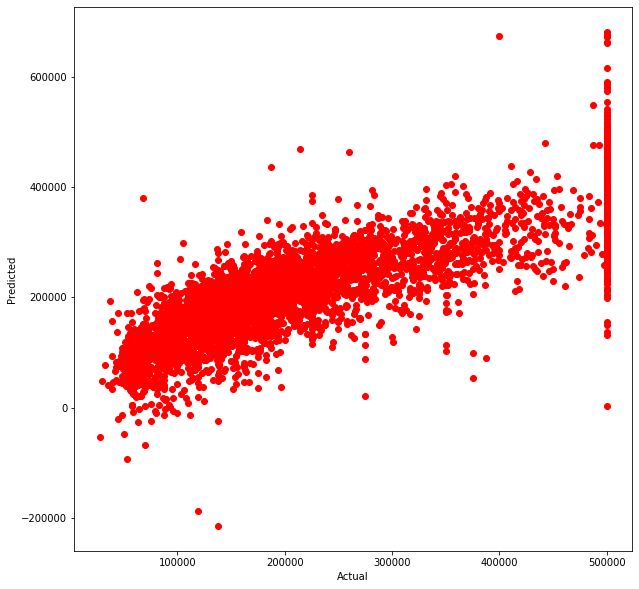

In [181]:
import matplotlib.pyplot as plt

plt.plot(y_test, housing_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Can we say if this is a good model or anything about its performance?

# Reading

[Spurious correlations (High $r^2$ useless relationships)](https://www.tylervigen.com/spurious-correlations)
<br>[Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com)
<br>[Additional examples from statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)
<br> [Common pitfalls](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html)